<a href="https://colab.research.google.com/github/harshit37/MS333_Ciao_Bella/blob/master/Gun_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1977 (delta 5), reused 10 (delta 4), pack-reused 1963
Receiving objects: 100% (1977/1977), 5.17 MiB | 8.04 MiB/s, done.
Resolving deltas: 100% (1285/1285), done.
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 2)) (0.29.21)
     |████████████████████████████████| 11.5MB 8.7MB/s 
     |████████████████████████████████| 14.5MB 237kB/s 
     |████████████████████████████████| 43.7MB 2.0MB/s 
     |████████████████████████████████| 2.2MB 50.1MB/s 
     |████████████████████████████████| 276kB 56.0MB/s 
     |████████████████████████████████| 25.9MB 129kB/s 
     |████████████████████████████████| 6.8MB 51.6MB/s 
Requirement already up-to-date: torch>=1.6.0 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 11)) (1.6.0+c

In [ ]:
import shutil
shutil.copy("/content/drive/My Drive/SIH/SIH Videos/gun_cars.mp4","/content")

'/content/gun_cars.mp4'

In [ ]:
%cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5


In [ ]:
import torch
from IPython.display import Image  # for displaying images   # for downloading models/datasets

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
!python detect.py --source /content/gun_cars.mp4 --weights /content/best_wm.pt --conf 0.6

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.6, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/gun_cars.mp4', update=False, view_img=False, weights=['/content/best_wm.pt'])
/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla T4 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the Tesla T4 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'models.yolo.Model' has changed. you can retrieve the original source 

In [ ]:
path="/content/drive/My Drive/YOLOv3_files/yolo.names"
labelsPath = path
LABELS = open(labelsPath).read().strip().split("\n")
print(LABELS)


['gun']


In [11]:
# 3 files required -> coco.names,yolov3.weigths,yolov3.cfg and a sample image .. 
# link to files https://drive.google.com/drive/folders/1SJ084lQ7ACXnjnrG8Q8tkfvhm4oAma16?usp=sharing
# change the paths accordingly
# change the cv2_imshow function if running on laptop,on colab it will work fine



import numpy as np
import argparse
import time
from cv2 import cv2
import os
from google.colab.patches import cv2_imshow


def extract_gun(frame):
  # path="data/vehicle-detector/voc.names"
   
  path="/content/drive/My Drive/YOLOv3_files/yolo.names"

  weightsPath = "/content/drive/My Drive/YOLOv3_files/yolov3_900.weights"
  configPath = "/content/drive/My Drive/YOLOv3_files/yolov3_custom_train.cfg"
  
  #path = "src/alpr/alpr_data/vehicle-detector/yolo-coco/coco.names"
  labelsPath = path
  LABELS = open(labelsPath).read().strip().split("\n")
  print(LABELS)
  np.random.seed(42)
  COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
    dtype="uint8")

  # weightsPath="data/vehicle-detector/yolo-voc.weights"
  # configPath ="data/vehicle-detector/yolo-voc.cfg"

 # weightsPath = "src/alpr/alpr_data/vehicle-detector/yolo-coco/yolov3.weights"
  #configPath = "src/alpr/alpr_data/vehicle-detector/yolo-coco/yolov3.cfg"

  print("Running vehicle-detector.py for database")
  net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)



#This is not the path of the image
#it is after cv2 has read the image


  image=frame																
  (H, W) = image.shape[:2]


  ln = net.getLayerNames()
  ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]


  blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
  net.setInput(blob)
  layerOutputs = net.forward(ln)


  boxes = []
  confidences = []
  classIDs = []
  #print("out")
  for output in layerOutputs:
    #print("in")
    for detection in output:
      scores = detection[5:]
      classID = np.argmax(scores)
      #print(classID)
      confidence = scores[classID]
      if confidence > 0.3:
        box = detection[0:4] * np.array([W, H, W, H])
        (centerX, centerY, width, height) = box.astype("int")
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))
        
        

        confidences.append(float(confidence))
        boxes.append([x, y, int(width), int(height)])
        classIDs.append(classID)
  idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0.3)
  #print(classIDs)
  #print(len(idxs))
  #print(classID)
  if len(idxs) > 0:
    #print("justabove bb")
    for i in idxs.flatten():
      #print("making bb")
      (x, y) = (boxes[i][0], boxes[i][1])
      (w, h) = (boxes[i][2], boxes[i][3])
      #print(x,y,w,h)
      color = [int(c) for c in COLORS[classIDs[i]]]
      cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
      text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
      cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, color, 2)
      

  img = image.copy()
  #writer.write(img)
  
  

  cv2_imshow(img)








['gun']
Running vehicle-detector.py for database


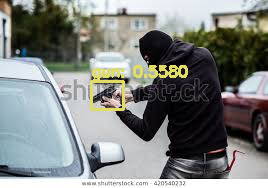

In [12]:
import cv2
path="/content/guncar5.jpg"
img=cv2.imread(path)

extract_gun(img)

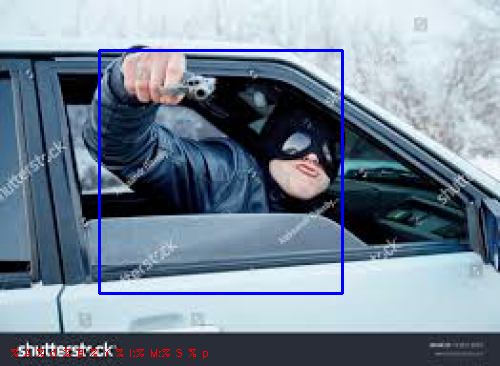

guns detected


In [17]:
import numpy as np 
import cv2 
import imutils 
import datetime 
  
path="/content/guncar3.jpg"
gun_cascade = cv2.CascadeClassifier('/content/gun_cascade.xml') 
camera = cv2.VideoCapture(path) 
   
firstFrame = None
gun_exist = False
   

  
ret, frame = camera.read() 

frame = imutils.resize(frame, width = 500) 
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    
gun = gun_cascade.detectMultiScale(gray, 
                                    1.3, 5, 
                                    minSize = (100, 100)) 
    
if len(gun) > 0: 
    gun_exist = True
        
for (x, y, w, h) in gun: 
      
    frame = cv2.rectangle(frame, 
                          (x, y), 
                          (x + w, y + h), 
                          (255, 0, 0), 2) 
    roi_gray = gray[y:y + h, x:x + w] 
    roi_color = frame[y:y + h, x:x + w]     

  

# print(datetime.date(2019)) 
# draw the text and timestamp on the frame 
cv2.putText(frame, datetime.datetime.now().strftime("% A % d % B % Y % I:% M:% S % p"), 
            (10, frame.shape[0] - 10), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            0.35, (0, 0, 255), 1) 


cv2_imshow(frame)
if gun_exist: 
  print("guns detected") 
else: 
  print("guns NOT detected") 
  